<br>

<p style="font-family:'Candara'; font-size:35px; text-align: center; color: #272D2D"> Medicine Side Effects Analysis (NLP)</p> 

<br>

____________________________________________________________

<p style="font-family:'Candara'; font-size:20px; color: #50514F; text-align: center;"> 
    Objective : This Analysis can be helpful for providing detailed rating of the side effects of the Medicine. It could also be     helpful for the patients who are buying drugs online to check the side effects of  the drugs before buying it.
</p> 

_______________________________________________________________

<p style="font-family:'Candara'; font-size:23px; color: #50514F; text-align: center;"> 
    Importing Libraries necessary for the notebook
</p>    

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import re
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

_________________________________________________________

<p style="font-family:'Candara'; font-size:23px; color: #50514F; text-align: center;"> 
    Medicine data
</p> 

<p style="font-family:'Candara'; font-size:20px; color: #50514F; text-align: center;"> 
    The dataset contains patient reviews on specific medicines and with related conditions and their satisfaction rated on a scale of 1 to 10. (1 being the worst and 10 being the excellent)
</p> 

__________________________________________

In [35]:
medicine_data = pd.read_csv("medicine_reviews - drugsComTest_raw.csv")
#medicine_data = pd.read_csv("demo.csv")

_____________________________________

<p style="font-family:'Candara'; font-size:23px; color: #50514F; text-align: center;"> 
    Exploratory Data Analysis
</p> 

<br>

In [36]:
medicine_data.head(10)

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,"February 28, 2012",22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,"May 17, 2009",17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,"September 29, 2017",3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,"March 5, 2017",35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,"October 22, 2015",4
5,208087,Zyclara,Keratosis,"""4 days in on first 2 weeks. Using on arms an...",4,"July 3, 2014",13
6,215892,Copper,Birth Control,"""I&#039;ve had the copper coil for about 3 mon...",6,"June 6, 2016",1
7,169852,Amitriptyline,Migraine Prevention,"""This has been great for me. I&#039;ve been on...",9,"April 21, 2009",32
8,23295,Methadone,Opiate Withdrawal,"""Ive been on Methadone for over ten years and ...",7,"October 18, 2016",21
9,71428,Levora,Birth Control,"""I was on this pill for almost two years. It d...",2,"April 16, 2011",3


<br>

In [37]:
medicine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53766 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   53766 non-null  int64 
 1   drugName     53766 non-null  object
 2   condition    53471 non-null  object
 3   review       53766 non-null  object
 4   rating       53766 non-null  int64 
 5   date         53766 non-null  object
 6   usefulCount  53766 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 2.9+ MB


<br>

In [38]:
medicine_data.describe()

,Unnamed: 0,rating,usefulCount
count,53766.000000,53766.000000,53766.000000
mean,116386.701187,6.976900,27.989752
std,67017.739881,3.285207,36.172833
min,0.000000,1.000000,0.000000
25%,58272.500000,4.000000,6.000000
50%,116248.500000,8.000000,16.000000
75%,174586.750000,10.000000,36.000000
max,232284.000000,10.000000,949.000000


<br>

<p style="font-family:'Candara'; font-size:20px; color: #50514F;"> 
    Missing Values
</p> 

Text(0.5, 1.0, 'Missing Values')

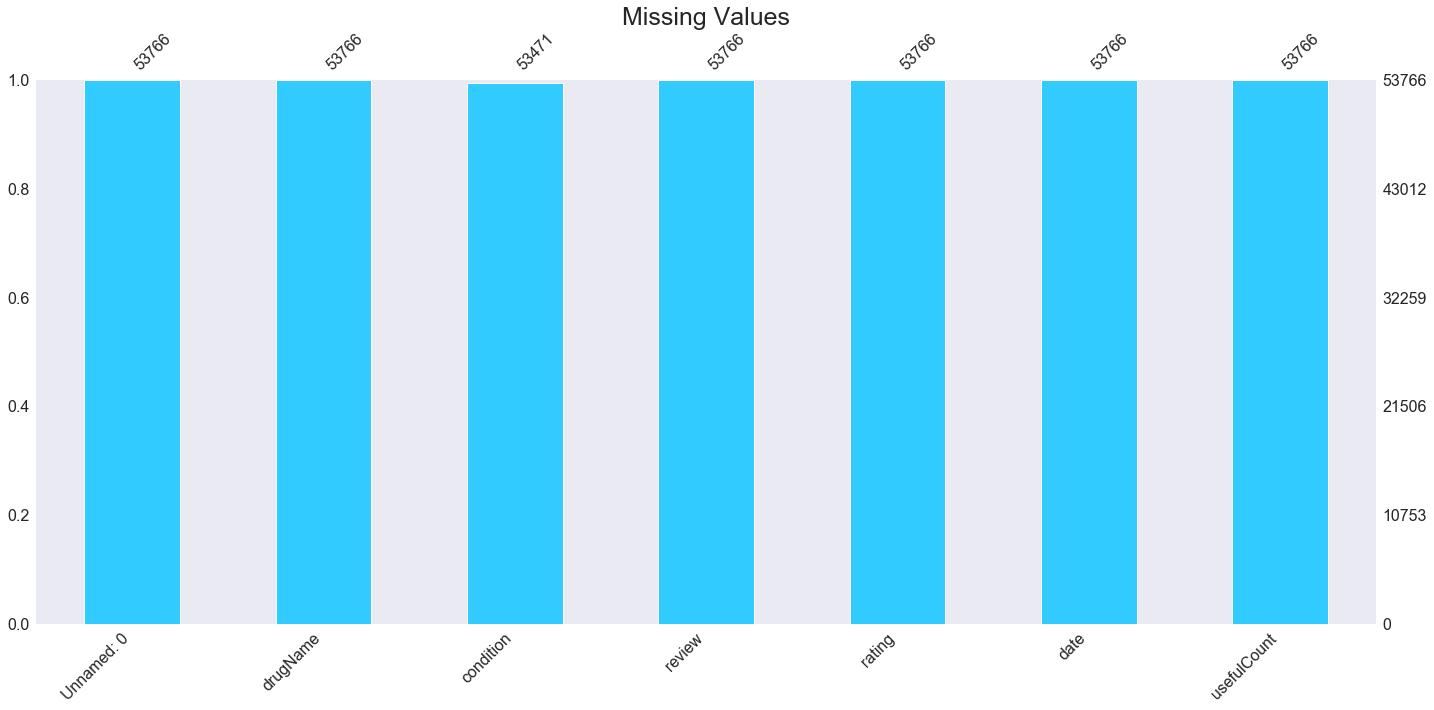

In [39]:
sns.set_style("dark")
msno.bar(medicine_data,color=("#32cbff"))
plt.title("Missing Values", fontsize = 25)

In [40]:
medicine_data.isnull().sum()

Unnamed: 0       0
drugName         0
condition      295
review           0
rating           0
date             0
usefulCount      0
dtype: int64

(array([  0.,  50., 100., 150., 200., 250., 300., 350.]),
 <a list of 8 Text yticklabel objects>)

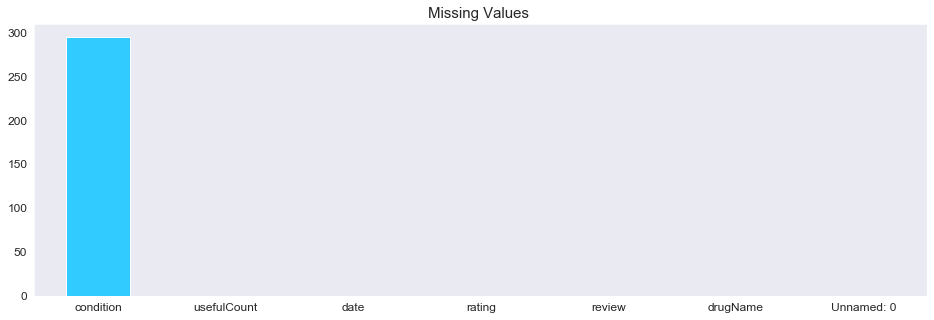

In [41]:
percent = (medicine_data.isnull().sum()).sort_values(ascending=False)
percent.plot(kind="bar", figsize = (16,5), fontsize = 12, color=("#32cbff"))
plt.title("Missing Values ", fontsize = 15)
plt.xticks(rotation=0)
plt.yticks(rotation=0)

<br>

<p style="font-family:'Candara'; font-size:20px; color: #50514F;"> 
    Removing Index/ID column, since it has no effect on Data Analysis.
</p>

In [42]:
med_data = pd.DataFrame(medicine_data)
med_data = med_data[['drugName', 'condition', 'review', 'rating', 'date','usefulCount']]
med_data.head()

,drugName,condition,review,rating,date,usefulCount
0,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,"February 28, 2012",22
1,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,"May 17, 2009",17
2,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,"September 29, 2017",3
3,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,"March 5, 2017",35
4,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,"October 22, 2015",4


In [43]:
med_data.shape

(53766, 6)

_______________________________________

In [44]:
med_data = med_data.dropna()

In [45]:
span_conditions = []
for i,j in enumerate(med_data['condition']):
    if '</span>' in j:
        span_conditions.append(i)

In [46]:
span_condition = round((len(span_conditions))/med_data.shape[0]*100,2)
other_condition = round((len(med_data[med_data['condition'] == "Not Listed / Othe"]))/med_data.shape[0]*100,2)
na_condition = round((medicine_data["condition"].isnull().sum())/medicine_data.shape[0]*100,2)

print("Number of Span Conditions :",len(span_conditions))
print("Number of Other Conditions :",len(med_data[med_data['condition'] == "Not Listed / Othe"]))
print("Number of NaN Conditions :",medicine_data["condition"].isnull().sum())

print("\n")

print("Conditions that doesnt make sense (i.e. </span>) :", span_condition,"%")
print("Conditions that doesnt exists (i.e. Not Listed / Othe) :", other_condition,"%")
print("Conditions that are Missing :", na_condition,"%")

Number of Span Conditions : 271
Number of Other Conditions : 153
Number of NaN Conditions : 295


Conditions that doesnt make sense (i.e. </span>) : 0.51 %
Conditions that doesnt exists (i.e. Not Listed / Othe) : 0.29 %
Conditions that are Missing : 0.55 %


<br>

In [47]:
conditions_not_correct_percent = span_condition + other_condition + na_condition
conditions_not_correct_value = (len(span_conditions)) + (len(med_data[med_data['condition'] == "Not Listed / Othe"])) + (medicine_data["condition"].isnull().sum())

print("Conditions that are not correct value:", conditions_not_correct_value)
print("Conditions that are not correct %:", conditions_not_correct_percent, "%")
print("Remaining data :", 100 - conditions_not_correct_percent, "%")

Conditions that are not correct value: 719
Conditions that are not correct %: 1.35 %
Remaining data : 98.65 %


<br>

In [48]:
med_data = pd.DataFrame(med_data).reset_index()
all_index = set(med_data.index)
new_idx = all_index.difference(set(span_conditions))
med_data = med_data.iloc[list(new_idx)].reset_index()
del med_data['index']

In [49]:
med_data.drop((med_data[med_data['condition'] == "Not Listed / Othe"]).index, inplace = True)

In [50]:
med_data = med_data[['drugName', 'condition', 'review', 'rating', 'date','usefulCount']]
med_data.shape

(53047, 6)

_______________________________________

In [51]:
conditions = med_data.condition.value_counts().sort_values(ascending=False)
conditions[:20]

Birth Control                9648
Depression                   3095
Pain                         2100
Anxiety                      1908
Acne                         1847
Bipolar Disorde              1380
Weight Loss                  1248
Insomnia                     1231
Obesity                      1189
ADHD                         1126
Emergency Contraception       827
Vaginal Yeast Infection       811
Diabetes, Type 2              808
High Blood Pressure           783
Smoking Cessation             660
Abnormal Uterine Bleeding     648
Bowel Preparation             639
Migraine                      583
ibromyalgia                   579
Anxiety and Stress            573
Name: condition, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

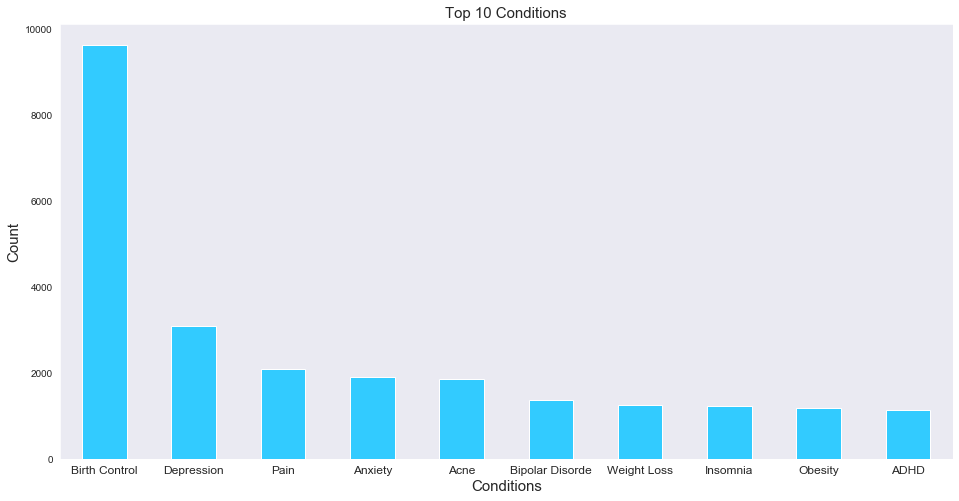

In [52]:
plt.figure(figsize=(16,8))
conditions[:10].plot(kind='bar', color="#32cbff")
plt.title('Top 10 Conditions', fontsize = 15)
plt.xlabel('Conditions', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(rotation=0, fontsize = 12)

In [53]:
condition_drug = pd.DataFrame(med_data[["drugName","condition"]])
condition_drug.head(10)

,drugName,condition
0,Mirtazapine,Depression
1,Mesalamine,"Crohn's Disease, Maintenance"
2,Bactrim,Urinary Tract Infection
3,Contrave,Weight Loss
4,Cyclafem 1 / 35,Birth Control
5,Zyclara,Keratosis
6,Copper,Birth Control
7,Amitriptyline,Migraine Prevention
8,Methadone,Opiate Withdrawal
9,Levora,Birth Control


In [54]:
condition_drug.nunique()

drugName     2627
condition     663
dtype: int64

In [55]:
condition_drug_unique = condition_drug.drop_duplicates(keep='first')
condition_drug_unique.head(10)

,drugName,condition
0,Mirtazapine,Depression
1,Mesalamine,"Crohn's Disease, Maintenance"
2,Bactrim,Urinary Tract Infection
3,Contrave,Weight Loss
4,Cyclafem 1 / 35,Birth Control
5,Zyclara,Keratosis
6,Copper,Birth Control
7,Amitriptyline,Migraine Prevention
8,Methadone,Opiate Withdrawal
9,Levora,Birth Control


In [56]:
condition_drug_unique_value = condition_drug_unique.condition.value_counts().sort_values(ascending=False)
condition_drug_unique_value[:20]

Pain                         163
Birth Control                155
High Blood Pressure           99
Depression                    97
Acne                          90
Diabetes, Type 2              77
Anxiety                       70
Insomnia                      66
Bipolar Disorde               66
Allergic Rhinitis             65
Rheumatoid Arthritis          64
Osteoarthritis                57
Abnormal Uterine Bleeding     50
Migraine                      49
ADHD                          48
Major Depressive Disorde      43
ibromyalgia                   41
Endometriosis                 39
Irritable Bowel Syndrome      38
Chronic Pain                  38
Name: condition, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

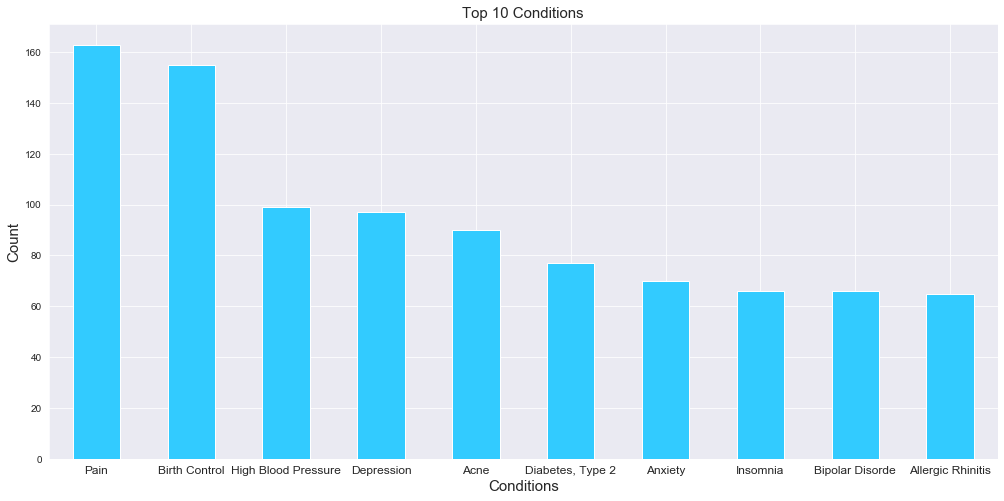

In [57]:
sns.set_style("darkgrid")
plt.figure(figsize=(17,8))
condition_drug_unique_value[:10].plot(kind='bar', color="#32cbff")
plt.title('Top 10 Conditions', fontsize = 15)
plt.xlabel('Conditions', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(rotation=0, fontsize = 12)

<br>

In [58]:
med_data.rating.value_counts().sort_values(ascending=False)

10    16805
9      9039
1      7219
8      6071
7      3044
5      2667
2      2304
3      2179
6      2088
4      1631
Name: rating, dtype: int64

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.,
        16000., 18000.]),
 <a list of 10 Text yticklabel objects>)

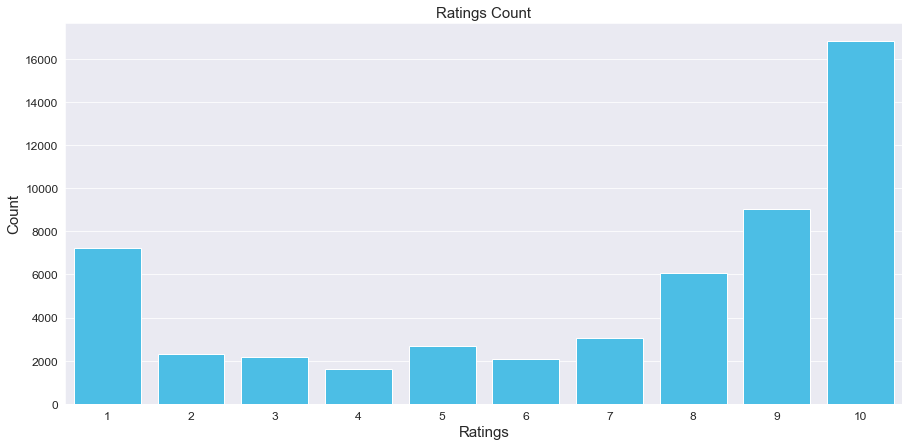

In [59]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,7))
sns.countplot(x="rating", data=med_data, color=("#32cbff"))
plt.title('Ratings Count', fontsize = 15)
plt.xlabel('Ratings', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

<br>

In [60]:
use_count = pd.DataFrame(data=med_data[["drugName","condition","usefulCount","rating"]].sort_values(ascending=False, by="usefulCount"))
use_count[:20]

,drugName,condition,usefulCount,rating
3789,Sertraline,Depression,949,9
28489,Etonogestrel,Birth Control,730,10
24910,Oxycodone,Pain,695,9
5051,OxyContin,Pain,695,9
2979,Sertraline,Depression,680,10
11533,Sertraline,Depression,644,9
35288,Cymbalta,Depression,621,10
11885,Buspirone,Anxiety,585,9
6256,Citalopram,Depression,559,9
45427,Vilazodone,Depression,513,9


(array([-200.,    0.,  200.,  400.,  600.,  800., 1000.]),
 <a list of 7 Text yticklabel objects>)

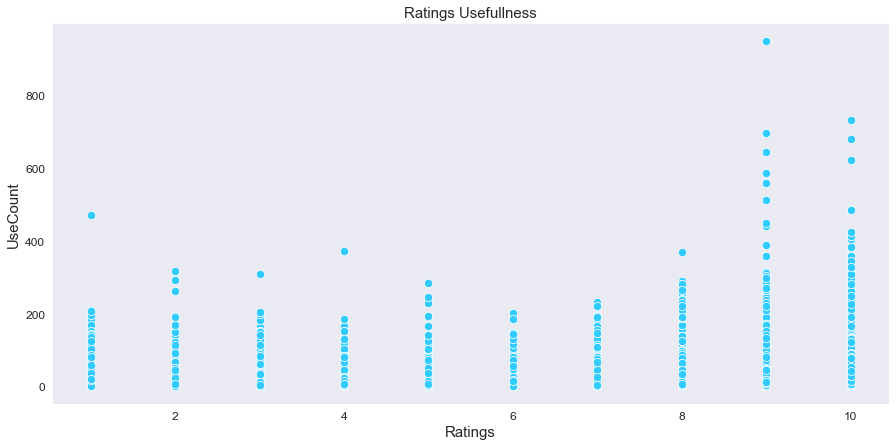

In [61]:
sns.set_style("dark")
plt.figure(figsize=(15,7))
sns.scatterplot(x = med_data["rating"], y = med_data["usefulCount"], data = med_data, color=("#32cbff"), s=70)
plt.title('Ratings Usefullness', fontsize = 15)
plt.xlabel('Ratings', fontsize = 15)
plt.ylabel('UseCount', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

<br>

In [62]:
use_count_ls = []
for i in range(1, 11):
    use_count_ls.append([i, np.sum(med_data[med_data.rating == i].usefulCount) / np.sum([med_data.rating == i])])
use_count_array = np.asarray(use_count_ls)

(array([10., 15., 20., 25., 30., 35., 40.]),
 <a list of 7 Text yticklabel objects>)

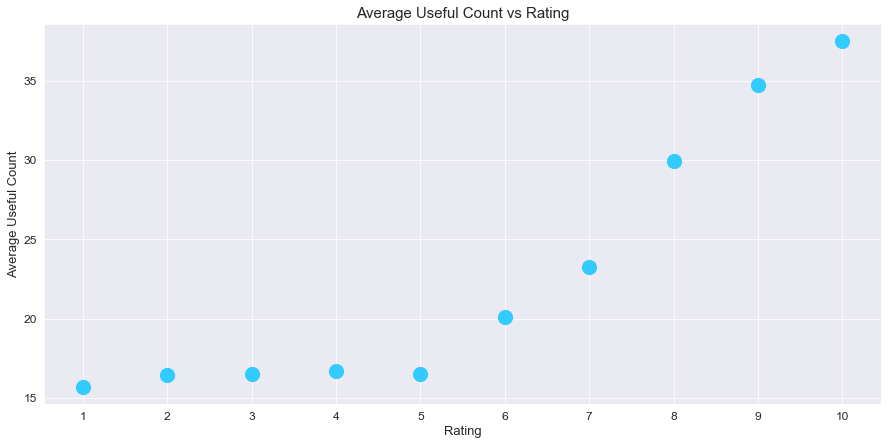

In [63]:
plt.figure(figsize=(15,7))
sns.set_style("darkgrid")
plt.scatter(use_count_array[:,0], use_count_array[:,1], s=200, c=("#32cbff"))
plt.title('Average Useful Count vs Rating',fontsize = 15)
plt.xlabel('Rating', fontsize = 13)
plt.ylabel('Average Useful Count', fontsize = 13)
plt.xticks([i for i in range(1, 11)],fontsize = 12)
plt.yticks(fontsize = 12)

<br>

<br>

In [64]:
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from textblob import TextBlob
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [65]:
stops = (stopwords.words('english'))
not_stop = ["aren't","couldn't","didn't","doesn't","don't","hadn't","hasn't","haven't","isn't","mightn't","mustn't","needn't","no","nor","not","shan't","shouldn't","wasn't","weren't","wouldn't"]
extra = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
for i in not_stop:
    stops.remove(i)
for i in extra:
    stops.append(i)
stops = set(stops)
stops = list(stops)
stops.sort()

In [68]:
def review_preprocess_sentiment(review_message):
    review_message = BeautifulSoup(review_message, 'html.parser').get_text()
    review_message = review_message.lower()
    review_message = review_message.split()
    review_message = [w for w in review_message if not w in stops]
    review_message = " ".join(review_message)
    review_message = re.sub('[^a-z]', ' ', review_message)
    review_message = review_message.split()
    review_message = [w for w in review_message if not w in stops]
    review_message = [lemmatizer.lemmatize(w) for w in review_message]
    return(' '.join(review_message))

med_data['review_short'] = med_data['review'].apply(review_preprocess_sentiment)

In [ ]:
med_data.head()

In [69]:
from nltk.corpus import twitter_samples
pos_tweets = twitter_samples.strings('positive_tweets.json') 
neg_tweets = twitter_samples.strings('negative_tweets.json')
all_tweets = twitter_samples.strings('tweets.20150430-223406.json')

from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)

#-------------------------------------------------------------------------------------------------------------------------------

import string
import re
 
from nltk.corpus import stopwords 

stopwords_english = stopwords.words('english')

not_stop = ["aren't","couldn't","didn't","doesn't","don't","hadn't","hasn't","haven't","isn't","mightn't","mustn't","needn't","no","nor","not","shan't","shouldn't","wasn't","weren't","wouldn't"]
extra = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
for i in not_stop:
    stopwords_english.remove(i)
for i in extra:
    stopwords_english.append(i)
stopwords_english = set(stopwords_english)
stopwords_english = list(stopwords_english)
stopwords_english.sort()
 
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
 
# Happy Emoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])
 
# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])
 
# all emoticons (happy + sad)
emoticons = emoticons_happy.union(emoticons_sad)
 
def clean_tweets(tweet):
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
 
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
 
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
 
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
 
    tweets_clean = []    
    for word in tweet_tokens:
        if (word not in stopwords_english and # remove stopwords
              word not in emoticons and # remove emoticons
                word not in string.punctuation): # remove punctuation
            #tweets_clean.append(word)
            stem_word = stemmer.stem(word) # stemming word
            tweets_clean.append(stem_word)
 
    return tweets_clean

#-------------------------------------------------------------------------------------------------------------------------------

def bag_of_words(tweet):
    words = clean_tweets(tweet)
    words_dictionary = dict([word, True] for word in words)    
    return words_dictionary
 

pos_tweets_set = []
for tweet in pos_tweets:
    pos_tweets_set.append((bag_of_words(tweet), 'positive'))    
 

neg_tweets_set = []
for tweet in neg_tweets:
    neg_tweets_set.append((bag_of_words(tweet), 'negative'))
    
#-------------------------------------------------------------------------------------------------------------------------------

from random import shuffle 
shuffle(pos_tweets_set)
shuffle(neg_tweets_set)
 
test_set = pos_tweets_set[:1000] + neg_tweets_set[:1000]
train_set = pos_tweets_set[1000:] + neg_tweets_set[1000:]

#-------------------------------------------------------------------------------------------------------------------------------

from nltk import classify
from nltk import NaiveBayesClassifier
 
classifier = NaiveBayesClassifier.train(train_set)

In [71]:
test_set

[({'scurri': True,
   'agil': True,
   'ship': True,
   'solut': True,
   'avail': True,
   'market': True,
   'book': True,
   'free': True,
   'demo': True,
   'retail': True,
   'deliveri': True,
   'sme': True},
  'positive'),
 ({'photo': True, 'feetblog': True, '101': True}, 'positive'),
 ({'sometim': True,
   'ordinari': True,
   'thing': True,
   'made': True,
   'extraordinari': True,
   'right': True,
   'peopl': True},
  'positive'),
 ({'amaz': True, 'deserv': True, 'siddi': True}, 'positive'),
 ({'wait': True, 'code': True}, 'positive'),
 ({'enjoy': True, 'pic': True}, 'positive'),
 ({'isi': True, 'chan': True}, 'positive'),
 ({'read': True, 'today': True, "i'm": True, 'excit': True}, 'positive'),
 ({'oh': True,
   'ye': True,
   'shirt': True,
   "they'r": True,
   'nice': True,
   'rofl': True,
   'old': True,
   'mint': True,
   "i'm": True,
   'rock': True,
   'sexi': True,
   'superdri': True,
   'tee': True,
   'right': True},
  'positive'),
 ({'good': True, 'night': T

In [91]:
twitter_sentiments = []
for review in med_data['review_short']:
    rate = classifier.prob_classify(bag_of_words(review))
    twitter_sentiments += [rate.max()]
    
med_data['twitter_sentiment'] = twitter_sentiments    

In [92]:
textblob_sentiments = []
for review in med_data['review_short']:
    rate = TextBlob(review)
    textblob_sentiments += [rate.sentiment.polarity]
med_data['textblob_sentiment'] = textblob_sentiments

def sent_value(x):
    if x >= 0.5:
        return "positive"
    elif x < 0.5:
        return "negative"
    else:
        return x
    
med_data["textblob_sentiment"] = med_data["textblob_sentiment"].apply(lambda x : sent_value(x))

In [93]:
med_data.head()

,drugName,condition,review,rating,date,usefulCount,review_short,twitter_sentiment,textblob_sentiment
0,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22,tried antidepressant year citalopram fluoxetin...,negative,negative
1,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17,son crohn disease done well asacol no complain...,positive,negative
2,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3,quick reduction symptom,positive,negative
3,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35,contrave combine drug used alcohol smoking opi...,negative,negative
4,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4,birth control one cycle reading review type si...,negative,negative


<br>

In [94]:
med_data["twitter_sentiment"].value_counts()

negative    40139
positive    12908
Name: twitter_sentiment, dtype: int64

In [95]:
med_data["textblob_sentiment"].value_counts()

negative    50918
positive     2129
Name: textblob_sentiment, dtype: int64

<br>

In [97]:
med_data.head()

,drugName,condition,review,rating,date,usefulCount,review_short,twitter_sentiment,textblob_sentiment
0,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22,tried antidepressant year citalopram fluoxetin...,negative,negative
1,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17,son crohn disease done well asacol no complain...,positive,negative
2,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3,quick reduction symptom,positive,negative
3,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35,contrave combine drug used alcohol smoking opi...,negative,negative
4,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4,birth control one cycle reading review type si...,negative,negative


<br>

In [98]:
from collections import Counter
def freq(sent):
    split_it = sent.split()
    counter = Counter(split_it)
    most_occur = counter.most_common(5)
    return most_occur

In [99]:
d = med_data[['drugName', 'condition', 'rating', 'textblob_sentiment', 'twitter_sentiment']]
h = med_data[['drugName', 'condition', 'rating',  'review_short']]
j = pd.get_dummies(d['twitter_sentiment'])
d = pd.concat([d,j], axis = 1)
h = med_data.groupby(['drugName','condition'])['review_short'].apply(lambda x: ','.join(x)).reset_index()

p = d.groupby('drugName').median().reset_index()
f = d[['drugName', 'condition', 'rating']].groupby('drugName').agg(lambda x:x.value_counts().index[0]).reset_index()
g = d.groupby(['drugName']).sum().reset_index()
h['word_frequency'] = h['review_short'].apply(freq)

f["rating"] = p["rating"]
f["negative"] = g["negative"]
f["positive"] = g["positive"]
f["word_frequency"] = h["word_frequency"]

In [55]:
f.head(20)

,drugName,condition,rating,negative,positive,word_frequency
0,A / B Otic,Otitis Media,10.0,1.0,0.0,"[(day, 2), (drop, 1), (helped, 1), (much, 1), ..."
1,Abacavir / dolutegravir / lamivudine,HIV Infection,10.0,10.0,8.0,"[(no, 16), (side, 15), (triumeq, 15), (year, 1..."
2,Abacavir / lamivudine,HIV Infection,10.0,3.0,0.0,"[(hiv, 4), (since, 3), (combination, 3), (medi..."
3,Abatacept,Rheumatoid Arthritis,7.0,5.0,1.0,"[(month, 8), (medication, 6), (day, 5), (first..."
4,Abilify,Depression,8.0,87.0,59.0,"[(behavior, 2), (son, 1), (taking, 1), (abilif..."
5,Abilify Discmelt,Depression,9.0,1.0,0.0,"[(abilify, 3), (behavior, 3), (medicine, 2), (..."
6,Abilify Maintena,Schizophrenia,10.0,1.0,0.0,"[(abilify, 26), (mg, 23), (side, 23), (effect,..."
7,Abiraterone,Prostate Cance,10.0,2.0,1.0,"[(mg, 42), (depression, 36), (abilify, 30), (d..."
8,AbobotulinumtoxinA,acial Wrinkles,10.0,1.0,0.0,"[(weight, 17), (mg, 12), (year, 12), (abilify,..."
9,Abreva,Herpes Simplex,8.0,35.0,12.0,"[(side, 3), (effect, 3), (insomnia, 3), (sligh..."


<br>